# Tasks/Activities List:
Your code should contain the following activities/Analysis:

Read the cars dataset.
Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.
Transform the categorical data.
Apply the Multiple Linear Regression model
Print the model results
Get the feature importance
Visualize the diagnostic plots

In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [2]:
##Read the dataset

dataset = pd.read_csv ('AnomaData.csv')

In [3]:
#understand diffrent columns and data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [4]:
#undersand total number of records in dataset
len(dataset)

18398

In [5]:
#undersand total number of records in dataset
dataset.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [6]:
dataset = dataset.drop(['y.1'], axis=1)

In [7]:
dataset.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')

In [8]:
#undersand total number of columns present in dataset
len(dataset.columns)

61

In [9]:
dataset

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,05-01-1999 00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,05-01-1999 00:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,05-01-1999 00:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,05-01-1999 00:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,05-01-1999 00:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,5-29-99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,5-29-99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,5-29-99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


# Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

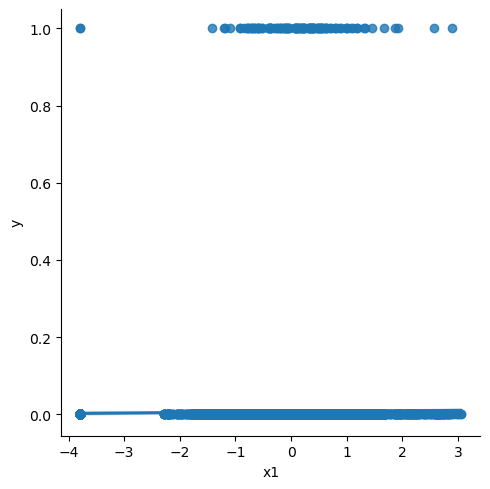

In [10]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset,y='y',x='x1')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

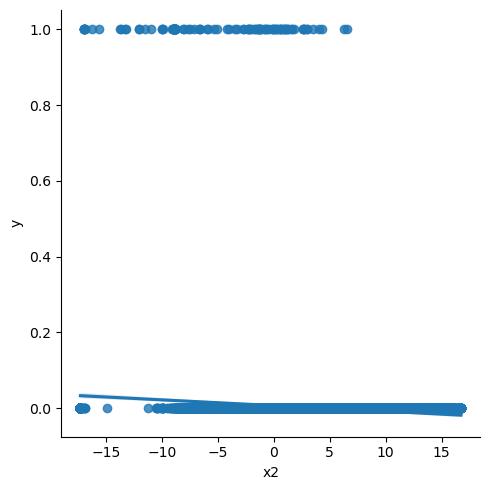

In [10]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset,y='y',x='x2')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

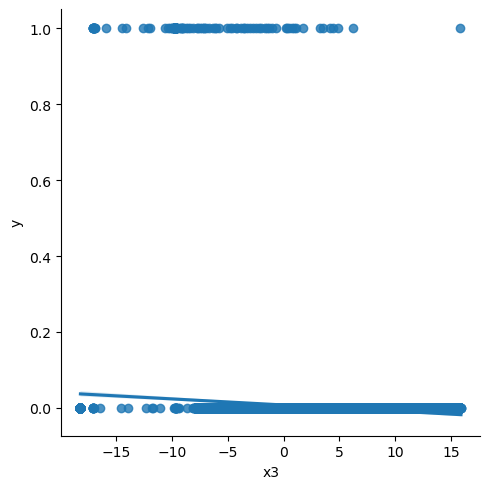

In [11]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset,y='y',x='x3')
plt.show()

not much information can be visualized through python plots as predictor values are large in numbers

## Missing value treatment

In [12]:
dataset.isnull().sum()/len(dataset)*100

time    0.0
y       0.0
x1      0.0
x2      0.0
x3      0.0
       ... 
x56     0.0
x57     0.0
x58     0.0
x59     0.0
x60     0.0
Length: 61, dtype: float64

In [13]:
dataset

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,05-01-1999 00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,05-01-1999 00:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,05-01-1999 00:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,05-01-1999 00:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,05-01-1999 00:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,5-29-99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,5-29-99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,5-29-99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


In [14]:
dataset.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')

# Assigning values to x and y

In [15]:
y_col= dataset['y']
y = y_col

In [16]:
x = dataset.drop(['time','y'], axis=1)

In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18393    0
18394    0
18395    0
18396    0
18397    0
Name: y, Length: 18398, dtype: int64

In [18]:
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


# Finding highly correlated values in x (predictor variable)

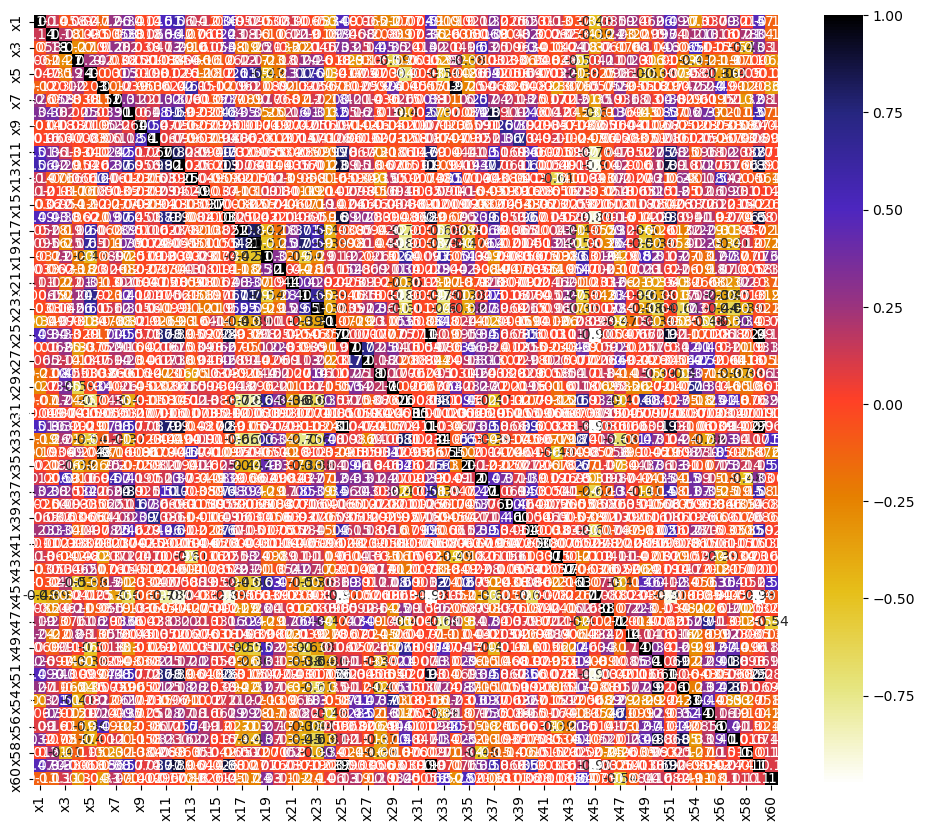

In [18]:
cor = x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [19]:
#Finding the correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
    col_corr.add(colname)
    return col_corr     

In [20]:
#Getting correlated features
corr_features = correlation(x, 0.7)
corr_features

{'x59'}

In [21]:
#Removing correlated features
x.drop(corr_features,axis=1)
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,-0.080108,-0.038189,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


# Splitting data into train and test

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

In [24]:
k_folds = KFold(n_splits = 5)

# Apply the Multiple Linear Regression model-with all features

In [25]:
model1 = LinearRegression()

# Fitting linear regression model on train data
model1.fit(x_train,y_train)

LinearRegression()

In [26]:
# Predict y using linear regression
y_pred = model1.predict(x_test)
y_pred

array([ 0.00427942, -0.01577404,  0.02323945, ...,  0.01551884,
       -0.01289782,  0.02045069])

Evaluation matrics for checking performance

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.02237195858516822
MSE: 0.006133716578724465
RMSE: 0.0783180475926492


In [28]:
print (model1.score(x_train,y_train))

0.11981823356318255


cross validating the model using k fold

In [29]:
scores1 = cross_val_score(model1, x, y, cv = k_folds)

In [30]:
print("Cross Validation Scores: ", scores1)
print("Average CV Score: ", scores1.mean())
print("Number of CV Scores used in Average: ", len(scores1))

Cross Validation Scores:  [ -0.20832754   0.05357875  -0.4564761  -11.61509113  -0.4628059 ]
Average CV Score:  -2.537824382234923
Number of CV Scores used in Average:  5


In [31]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

-2.54 accuracy with a standard deviation of 4.54


# feature selection

Feature 0: 3.369835
Feature 1: 80.649394
Feature 2: 148.765763
Feature 3: 8.957422
Feature 4: 1.335717
Feature 5: 4.559385
Feature 6: 2.360687
Feature 7: 0.030429
Feature 8: 1.482111
Feature 9: 0.249410
Feature 10: 9.819220
Feature 11: 0.074060
Feature 12: 3.446576
Feature 13: 0.759929
Feature 14: 10.273402
Feature 15: 0.021775
Feature 16: 20.449152
Feature 17: 24.963434
Feature 18: 204.669329
Feature 19: 8.591854
Feature 20: 0.259206
Feature 21: 3.088849
Feature 22: 2.539660
Feature 23: 0.253938
Feature 24: 0.625688
Feature 25: 6.113399
Feature 26: 1.632729
Feature 27: 0.038441
Feature 28: 19.166614
Feature 29: 0.009598
Feature 30: 0.027577
Feature 31: 0.611039
Feature 32: 0.247164
Feature 33: 5.365200
Feature 34: 6.395554
Feature 35: 1.537221
Feature 36: 1.319360
Feature 37: 0.136558
Feature 38: 0.236390
Feature 39: 0.593204
Feature 40: 0.688807
Feature 41: 8.222734
Feature 42: 1.121199
Feature 43: 3.902580
Feature 44: 0.387560
Feature 45: 7.567046
Feature 46: 0.519344
Feature 47: 1.

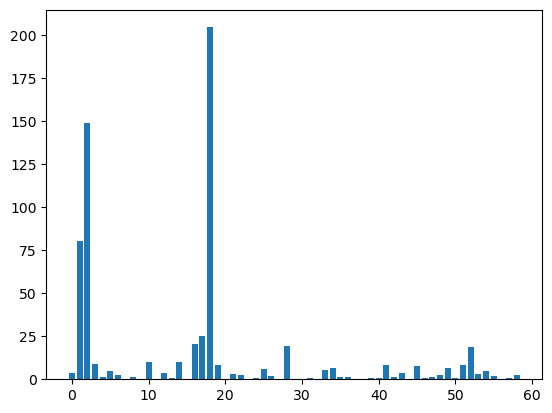

In [32]:
# feature selection
def select_features(x_train, y_train, x_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(x_train, y_train)
 # transform train input data
 x_train_fs = fs.transform(x_train)
 # transform test input data
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs
 
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

We can see that 10-15 features are of more importance than others

# Model Built Using selected Features
We can use the correlation method to score the features and select the 10 most relevant ones.

In [33]:
# feature selection defination
def select_features(x_train, y_train, x_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=f_regression, k=10)
 # learn relationship from training data
 fs.fit(x_train, y_train)
 # transform train input data
 x_train_fs = fs.transform(x_train)
 # transform test input data
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs

In [34]:
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model2 = LinearRegression()
model2.fit(x_train_fs, y_train)
ypred = model2.predict(x_train_fs)
ypred

array([ 0.04066111, -0.00054503, -0.00527663, ...,  0.01598958,
       -0.00532146, -0.02197431])

In [35]:
# evaluation matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=ypred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=ypred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.02237195858516822
MSE: 0.007210929940886443
RMSE: 0.08491719461267219


In [37]:
print (model2.score(x_test_fs,y_test))

0.06008472920677321


cross validating the model using k fold

In [45]:
scores2 = cross_val_score(model2, x, y, cv = k_folds)

In [46]:
print("Cross Validation Scores: ", scores2)
print("Average CV Score: ", scores2.mean())
print("Number of CV Scores used in Average: ", len(scores2))

Cross Validation Scores:  [ -0.20832754   0.05357875  -0.4564761  -11.61509113  -0.4628059 ]
Average CV Score:  -2.537824382234923
Number of CV Scores used in Average:  5


In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

-2.54 accuracy with a standard deviation of 4.54


# Using gradient boosting technique for model building

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
modelGBR = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)

In [40]:
modelGBR.score(x_train, y_train)

0.832262279636108

In [41]:
modelGBR.score(x_test, y_test)

0.46662027166061415

In [67]:
YPRED =modelGBR.predict(x_train)
YPRED

array([-6.90167425e-05,  3.94753655e-04,  4.88813853e-04, ...,
        3.70961159e-04, -3.96309584e-04,  5.45172177e-05])

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=YPRED)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=YPRED) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=YPRED,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.01331725739710279
MSE: 0.011401636230150555
RMSE: 0.10677844459510803


cross validating the model using k fold

In [42]:
scores3 = cross_val_score(modelGBR, x, y, cv = k_folds)

In [43]:
print("Cross Validation Scores: ", scores3)
print("Average CV Score: ", scores3.mean())
print("Number of CV Scores used in Average: ", len(scores3))

Cross Validation Scores:  [-0.84026641  0.05720382  0.47844399 -0.31958255 -0.69145519]
Average CV Score:  -0.26313126938538456
Number of CV Scores used in Average:  5


In [44]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

-0.26 accuracy with a standard deviation of 0.48


We can see that GRADIENT BOOSTING TECHNIQUE is the best method to build a model on this data. 

# Hyperparameter tuning using gardient boosting regressor

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
GBR = GradientBoostingRegressor()

In [32]:
#Let us set the parameter
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

In [ ]:
print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

# Tune the Number of Selected Features using a grid search, 
where the k argument to the SelectKBest class can be tuned.

In [32]:
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(x.shape[1]-20, x.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(x, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))